# Transform scaling

In [36]:
import numpy as np
from numpy import logspace, linspace
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig
import scipy.integrate
from scipy import signal

plt.rcParams['figure.figsize'] = [12, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({"axes.grid" : True, "grid.color": "grey"})
plt.rcParams['grid.linestyle'] = ':'

%matplotlib inline
tt = np.linspace(-3, 3, 1000)

from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, arg, atan2
from sympy.abc import A,B,t,f 
ts = Symbol('t')

def nicegrid():
    plt.grid(True, which='major', color='#666666', linestyle='-')
    plt.grid(True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.minorticks_on()

## Create some scaled rect functions

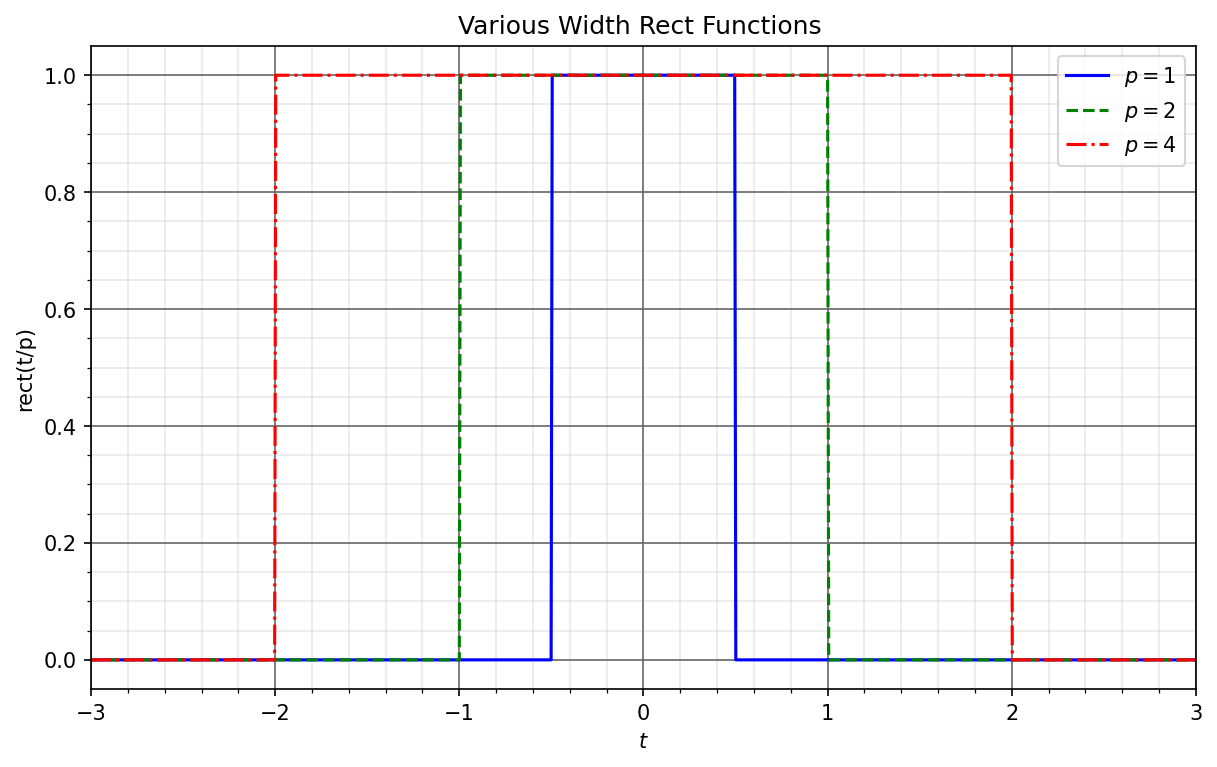

In [37]:
def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

f1 = my_rect(1)
f2 = my_rect(2)
f4 = my_rect(4)

lam_f1 = lambdify([ts], f1, modules=['numpy'])
lam_f2 = lambdify([ts], f2, modules=['numpy'])
lam_f4 = lambdify([ts], f4, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_f1(tt),'b',label='$p=1$')
plt.plot(tt, lam_f2(tt),'g--',label='$p=2$')
plt.plot(tt, lam_f4(tt),'r-.',label='$p=4$')

plt.grid(True, which='major', color='#666666', linestyle=':')
plt.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.minorticks_on()
plt.legend()
plt.xlim(-3,3)
plt.xlabel('$t$')
plt.ylabel('rect(t/p)')
plt.title('Various Width Rect Functions ')
nicegrid()
plt.show()

## Now Transform the scaled rects

In [27]:
Q1 = fourier_transform(f1, t, f)
Q2 = fourier_transform(f2, t, f, noconds=False)
sQ2 = sympify(Q2)
Q4 = fourier_transform(f4, t, f, noconds=False)
sQ4 = sympify(Q4)

## Plotting the transformed scaled rects

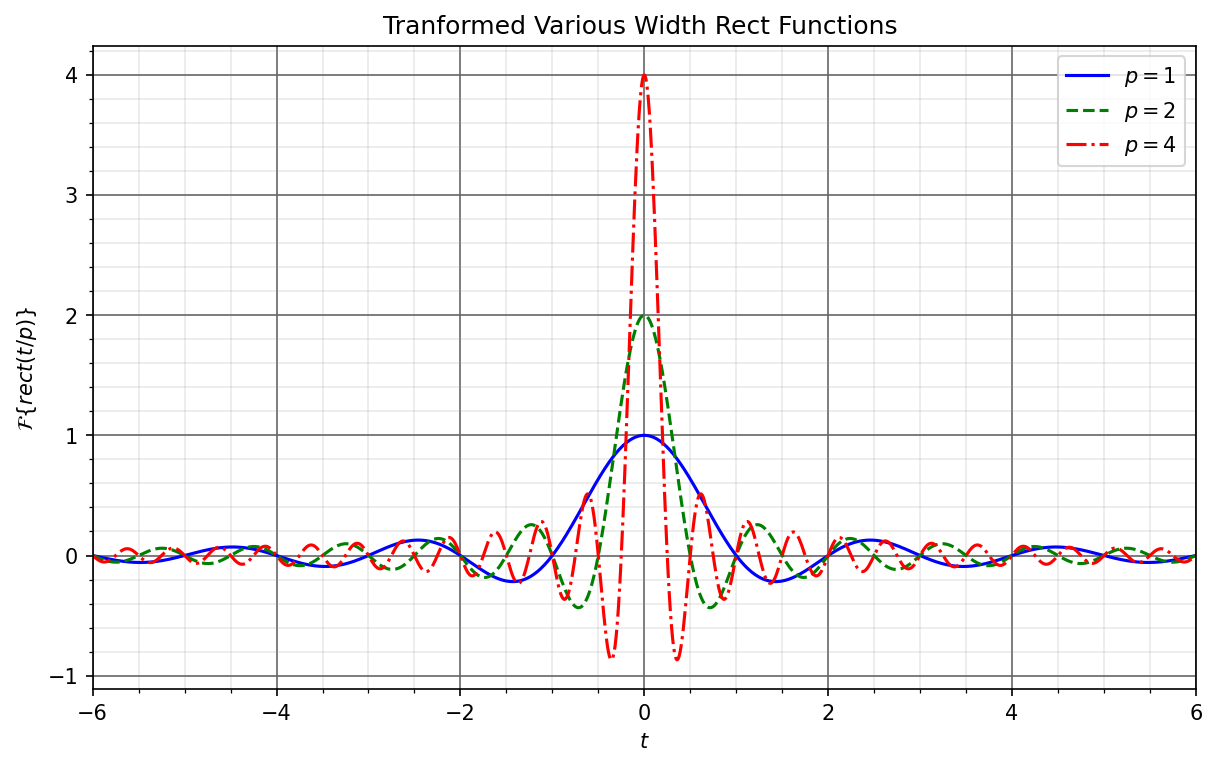

In [38]:
flim = 6
ff = np.linspace(-flim, flim, 1000)
lam_Q1 = lambdify([f], Q1, modules=['numpy'])
lam_Q2 = lambdify([f], sQ2[0], modules=['numpy'])
lam_Q4 = lambdify([f], sQ4[0], modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ff, lam_Q1(ff),'b',label='$p=1$')
plt.plot(ff, lam_Q2(ff),'g--',label='$p=2$')
plt.plot(ff, lam_Q4(ff),'r-.',label='$p=4$')

plt.grid(True, which='major', color='#666666', linestyle=':')
plt.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.minorticks_on()
plt.legend()
plt.xlim(-flim,flim)
plt.xlabel('$t$')
plt.ylabel('${\cal F}\{rect(t/p)\}$')
plt.title('Tranformed Various Width Rect Functions ')
nicegrid()
plt.show()

**Recall** - Expected transform: ${\tt rect}(t/p) \Leftrightarrow p {\tt sinc}(pf)$

 ## Now try transforming ${\tt sinc}(pt)$

In [33]:
p = Symbol('p')
sincu = lambda t,p: sinc(p*np.pi*t) # swithc to sinc ftn that evetyone else uses...
nf1 = sincu(t,1)
nf2 = sincu(t,2)
nf4 = sincu(t,4)

lam_nf1 = lambdify(t, nf1, modules=['numpy'])
lam_nf2 = lambdify(t, nf2, modules=['numpy'])
lam_nf4 = lambdify(t, nf4, modules=['numpy'])

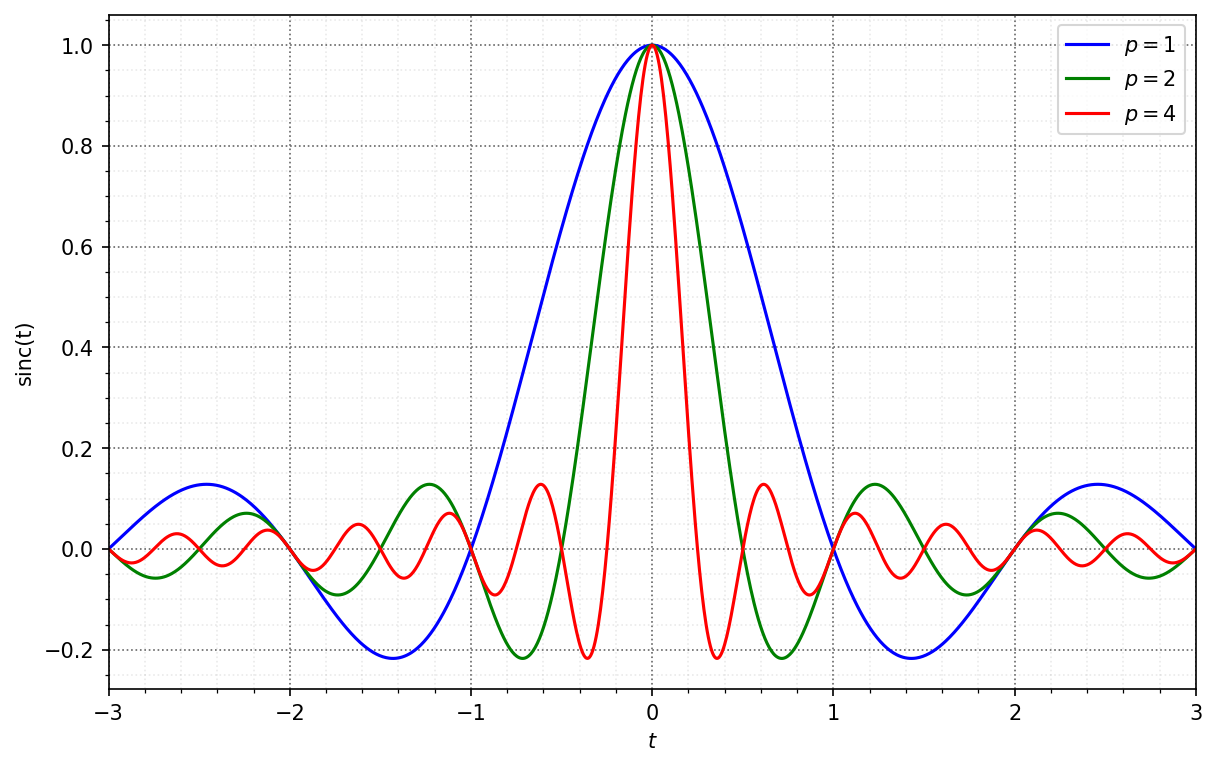

In [35]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_nf1(tt),'b',label='$p=1$')
plt.plot(tt, lam_nf2(tt),'g',label='$p=2$')
plt.plot(tt, lam_nf4(tt),'r',label='$p=4$')

plt.grid(True, which='major', color='#666666', linestyle=':')
plt.grid(True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.legend()
plt.xlim(-3,3)
plt.xlabel('$t$')
plt.ylabel('sinc(t)')
nicegrid()
plt.show()

In [15]:
nQ1 = fourier_transform(nf1, t, f)
nQ2 = fourier_transform(nf2, t, f)
nQ3 = fourier_transform(nf3, t, f)

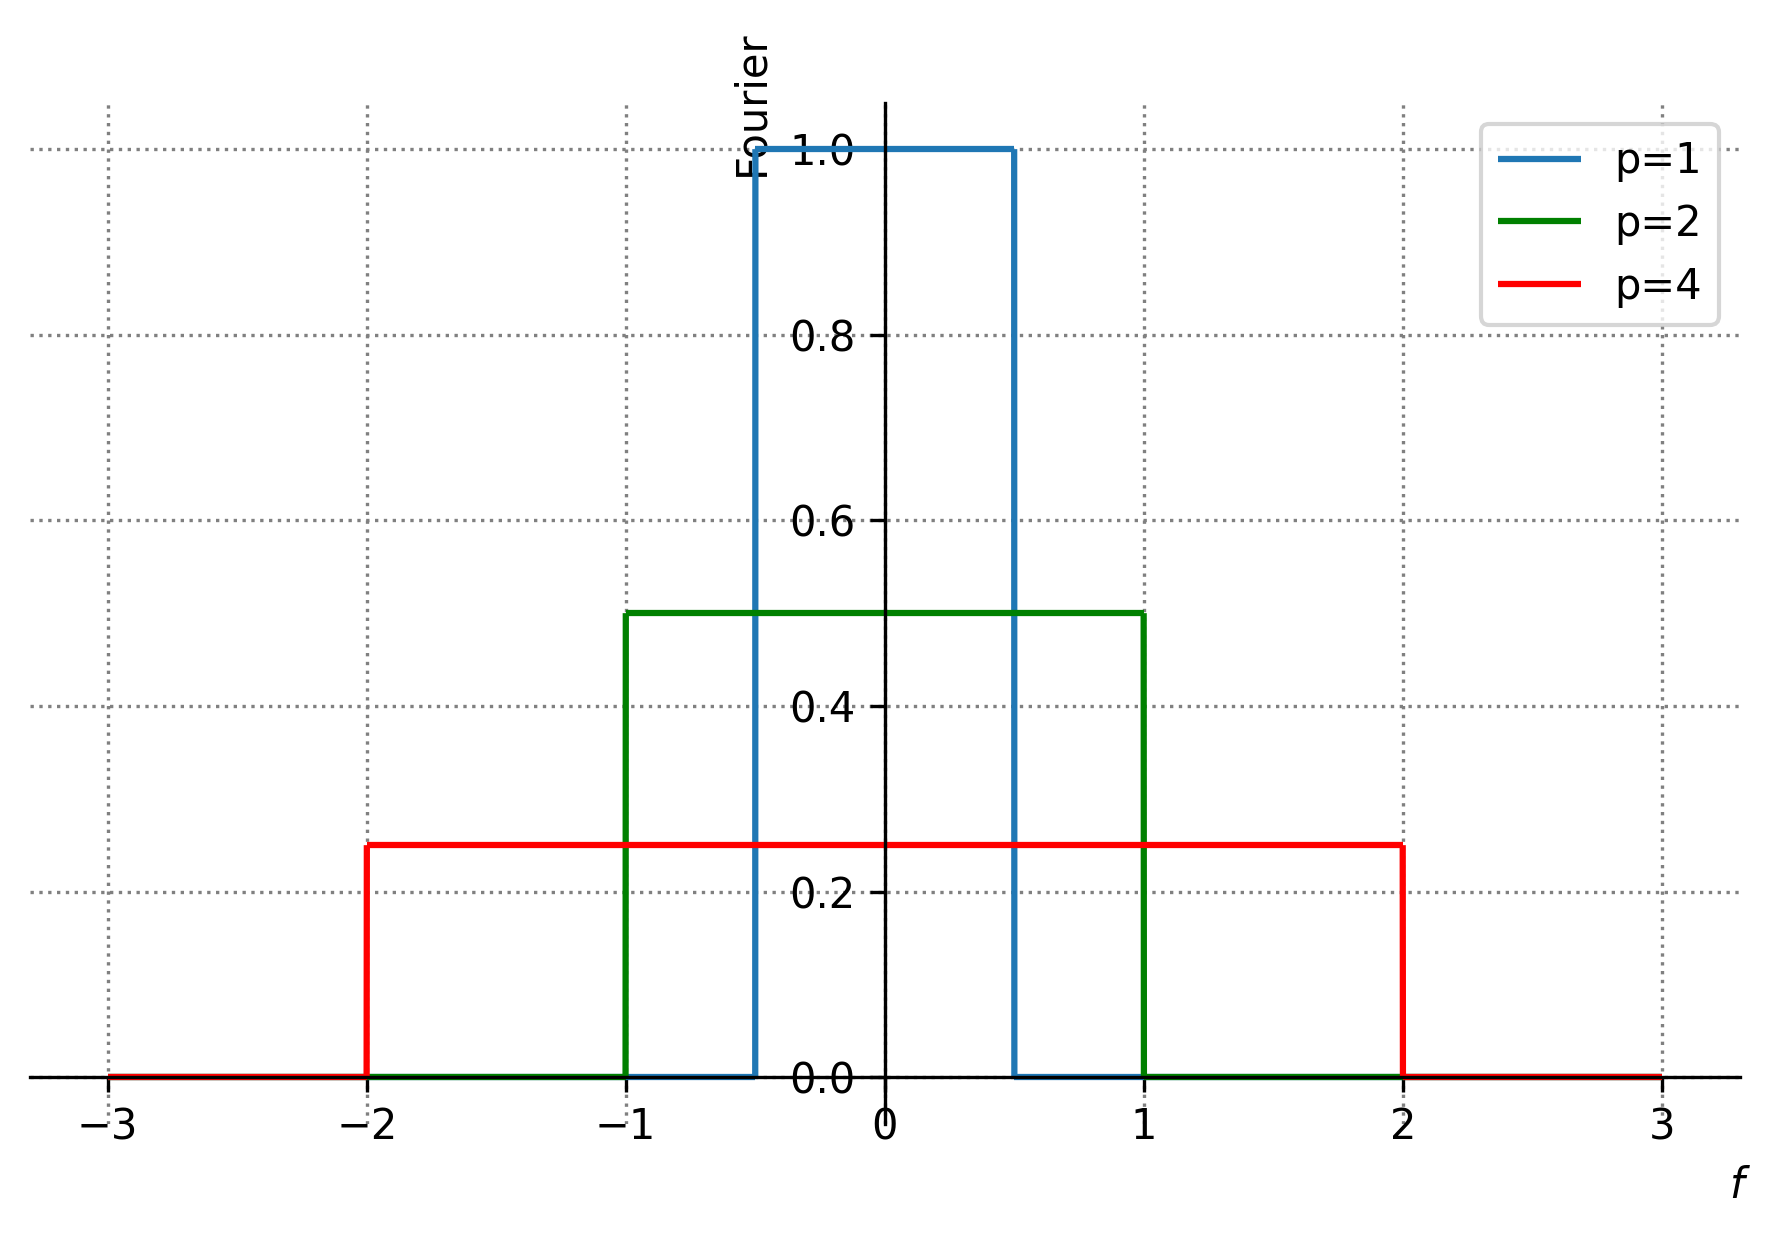

In [16]:
p1 = plot(nQ1, (f,-3,3), show=False, legend=True, label='p=1',xlabel='$f$',ylabel='Fourier')
p2 = plot(nQ2, (f,-3,3), line_color='green', show=False, label='p=2')
p3 = plot(nQ3, (f,-3,3),  line_color='red', show=False, label='p=4')
p1.append(p2[0])
p1.append(p3[0])
p1.show()

\textbf{ Recall } - Expected transform: ${\tt sinc}(pt) \Leftrightarrow (1/p) {\tt rect}(f/p)$

# Try $sinc(t-1)$

In [57]:
ntt = np.linspace(-4, 4, 1000)
A = Symbol('A')
B = Symbol('B')

sincuAB = lambda t,A,B: sinc(np.pi*(A*t+B)) # swithc to sinc ftn that evetyone else uses...
nf1 = sincuAB(t,1,-1)

lam_nf1 = lambdify(t, nf1, modules=['numpy'])

nQ1 = fourier_transform(nf1, t, f)

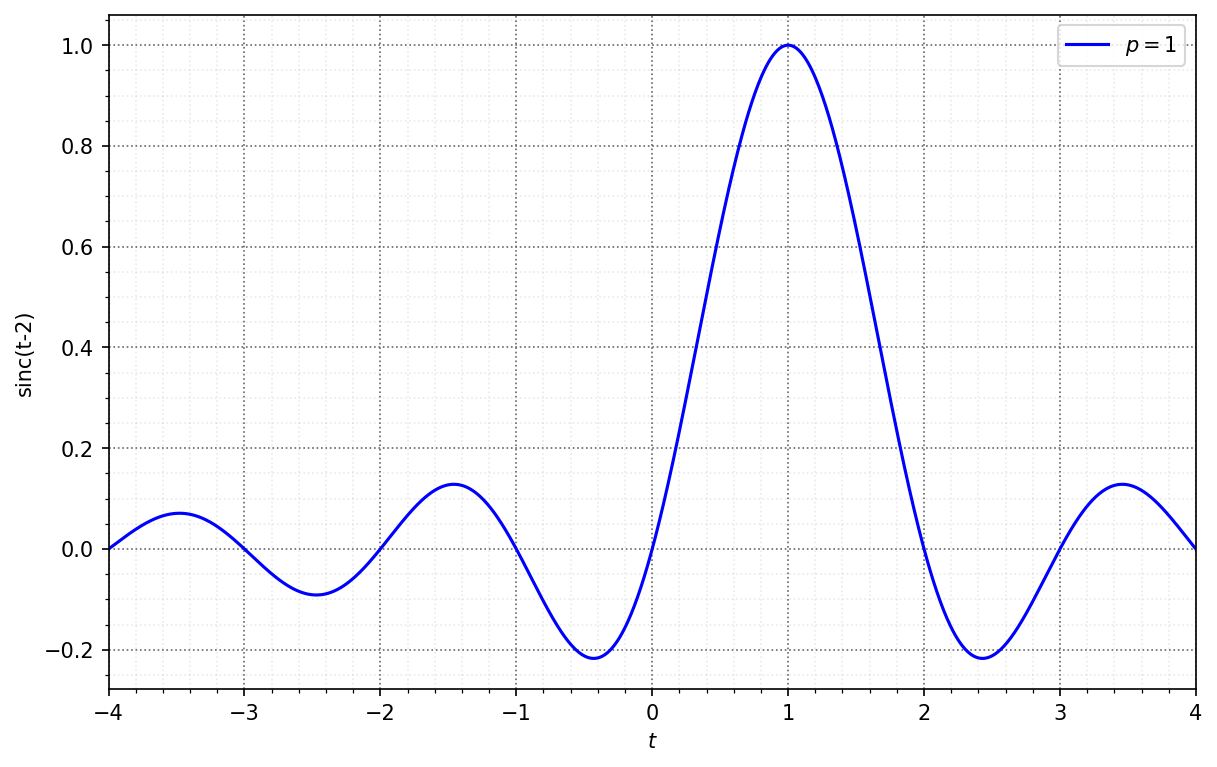

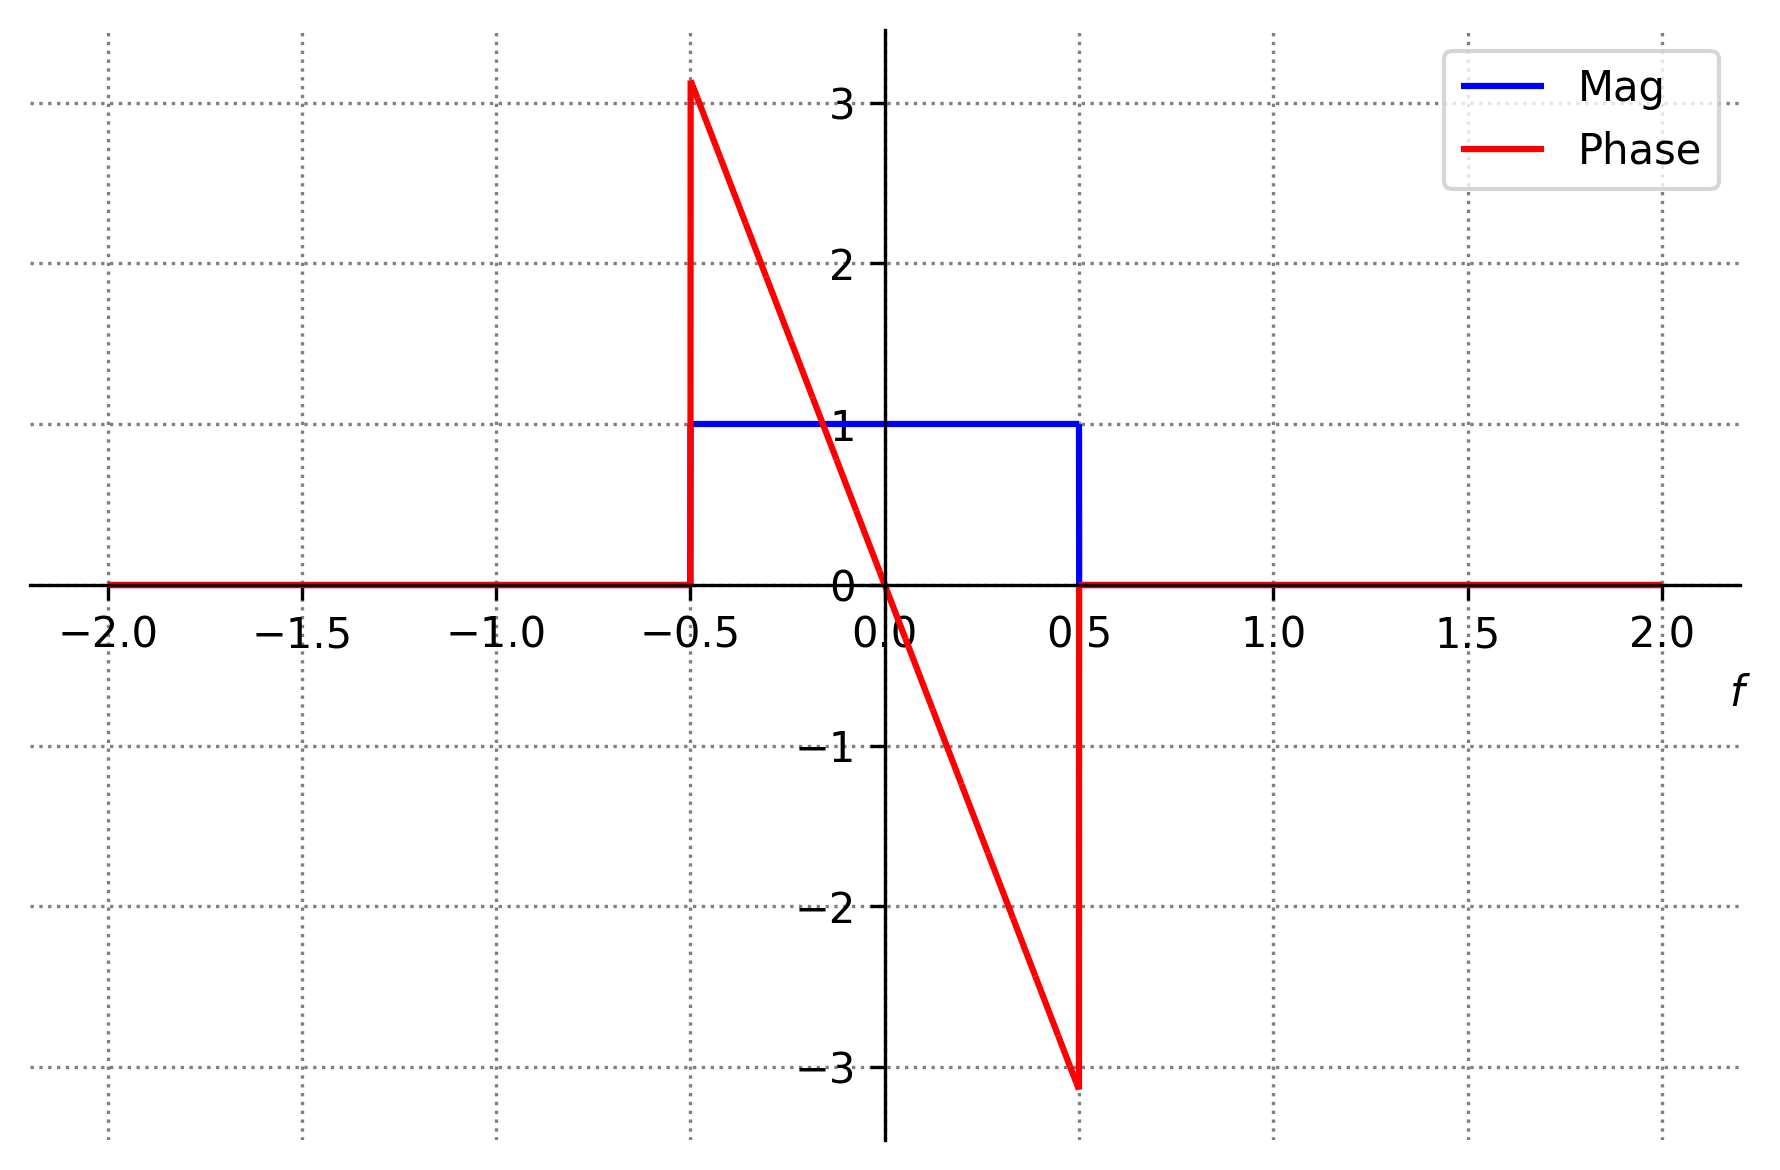

In [58]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ntt, lam_nf1(ntt),'b')

plt.grid(b=True, which='major', color='#666666', linestyle=':')
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.minorticks_on()
plt.legend()
plt.xlim(-4,4)
plt.xlabel('$t$')
plt.ylabel('sinc(t-2)')
plt.show()

plt.rcParams['figure.dpi'] = 300
p1 = plot(abs(nQ1), (f,-2,2), show=False, legend=True, label='Mag',xlabel='$f$',ylabel='',line_color='blue')
p2 = plot(arg(nQ1), (f,-2,2), show=False, legend=True, label='Phase',line_color='red')
p1.append(p2[0])
p1.show()

\textbf{Recall:} Based on time shift property, expected transform ${\tt sinc} (t-1) = e^{-2\pi f j}{\tt rect}(f)$

## Example 7 in Topic 7

In [59]:
f7 = Piecewise((0, t <= -2),(t+2, t <= -1),(1, t <= 1),(2-t, t <= 2),(0, True))
Q7 = fourier_transform(f7, t, f)

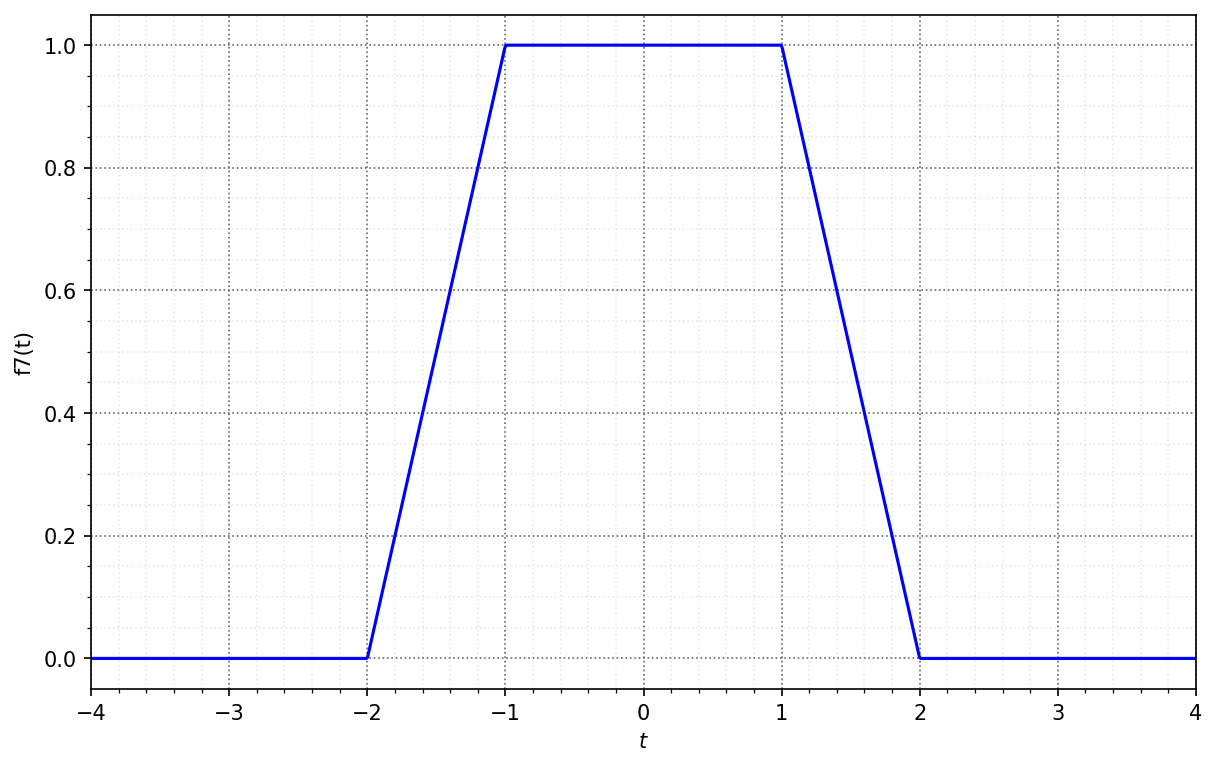

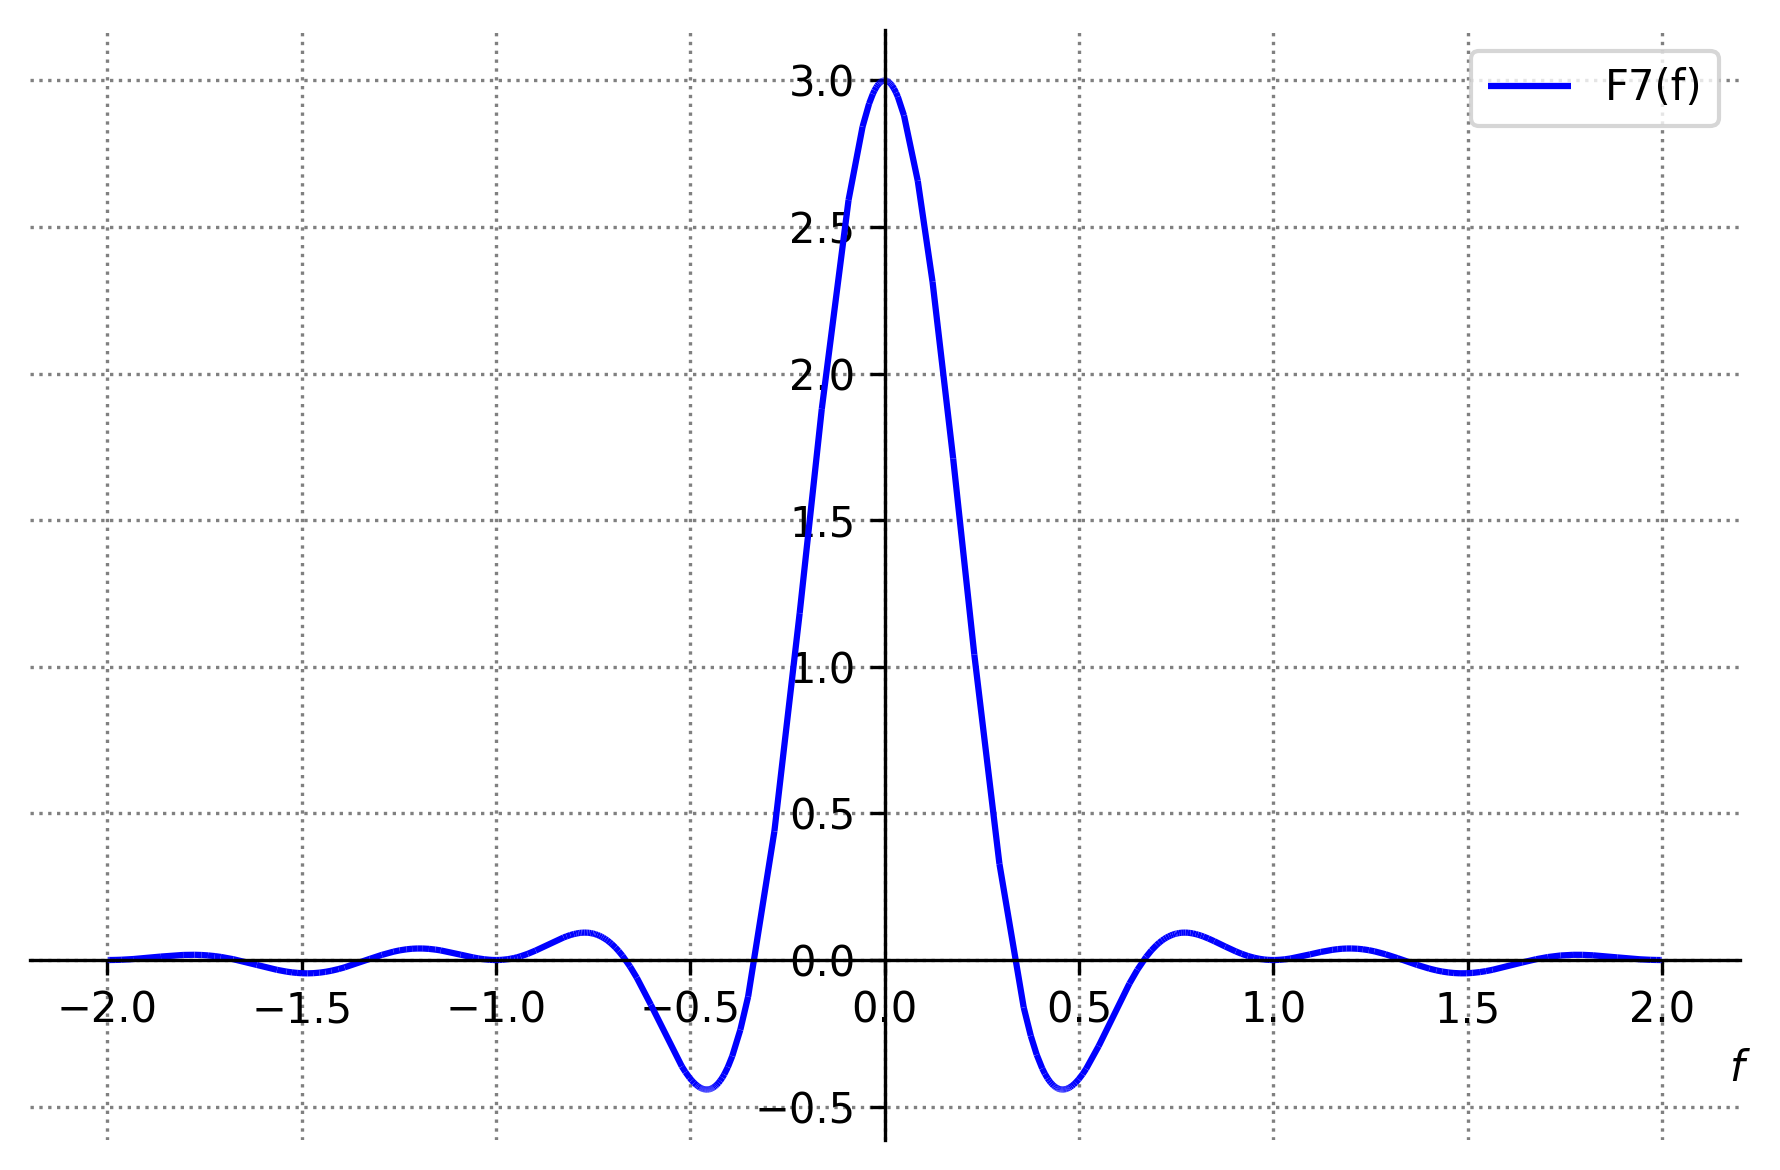

In [65]:
lam_f7 = lambdify(t, f7, modules=['numpy'])

fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(ntt, lam_f7(ntt),'b')

plt.grid(b=True, which='major', color='#666666', linestyle=':')
plt.grid(b=True, which='minor', color='#999999', linestyle=':', alpha=0.2)
plt.minorticks_on()
plt.xlim(-4,4)
plt.xlabel('$t$')
plt.ylabel('f7(t)')
plt.show()

plt.rcParams['figure.dpi'] = 300
p1 = plot(Q7, (f,-2,2), show=False, legend=True, label='F7(f)',xlabel='$f$',ylabel='',line_color='blue')
p1.show()